In [1]:
import sys
assert sys.version_info >= (3,7)

In [2]:
from packaging import version
import sklearn
assert version.parse(sklearn.__version__) >= version.parse("1.0.1")

In [3]:
import pandas as pd

In [4]:

url = 'https://raw.githubusercontent.com/Jatin-Mehra119/PRO1/main/housing.csv'

housing = pd.read_csv(url)


In [5]:
housing.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [6]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [7]:
print('checking for null values')
for cols in housing.columns[:-1]:
    print(f'{cols} : {housing[cols].isna().sum()}')

checking for null values
longitude : 0
latitude : 0
housing_median_age : 0
total_rooms : 0
total_bedrooms : 207
population : 0
households : 0
median_income : 0
median_house_value : 0


In [8]:
housing['ocean_proximity'].value_counts()

ocean_proximity
<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: count, dtype: int64

In [9]:
housing.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


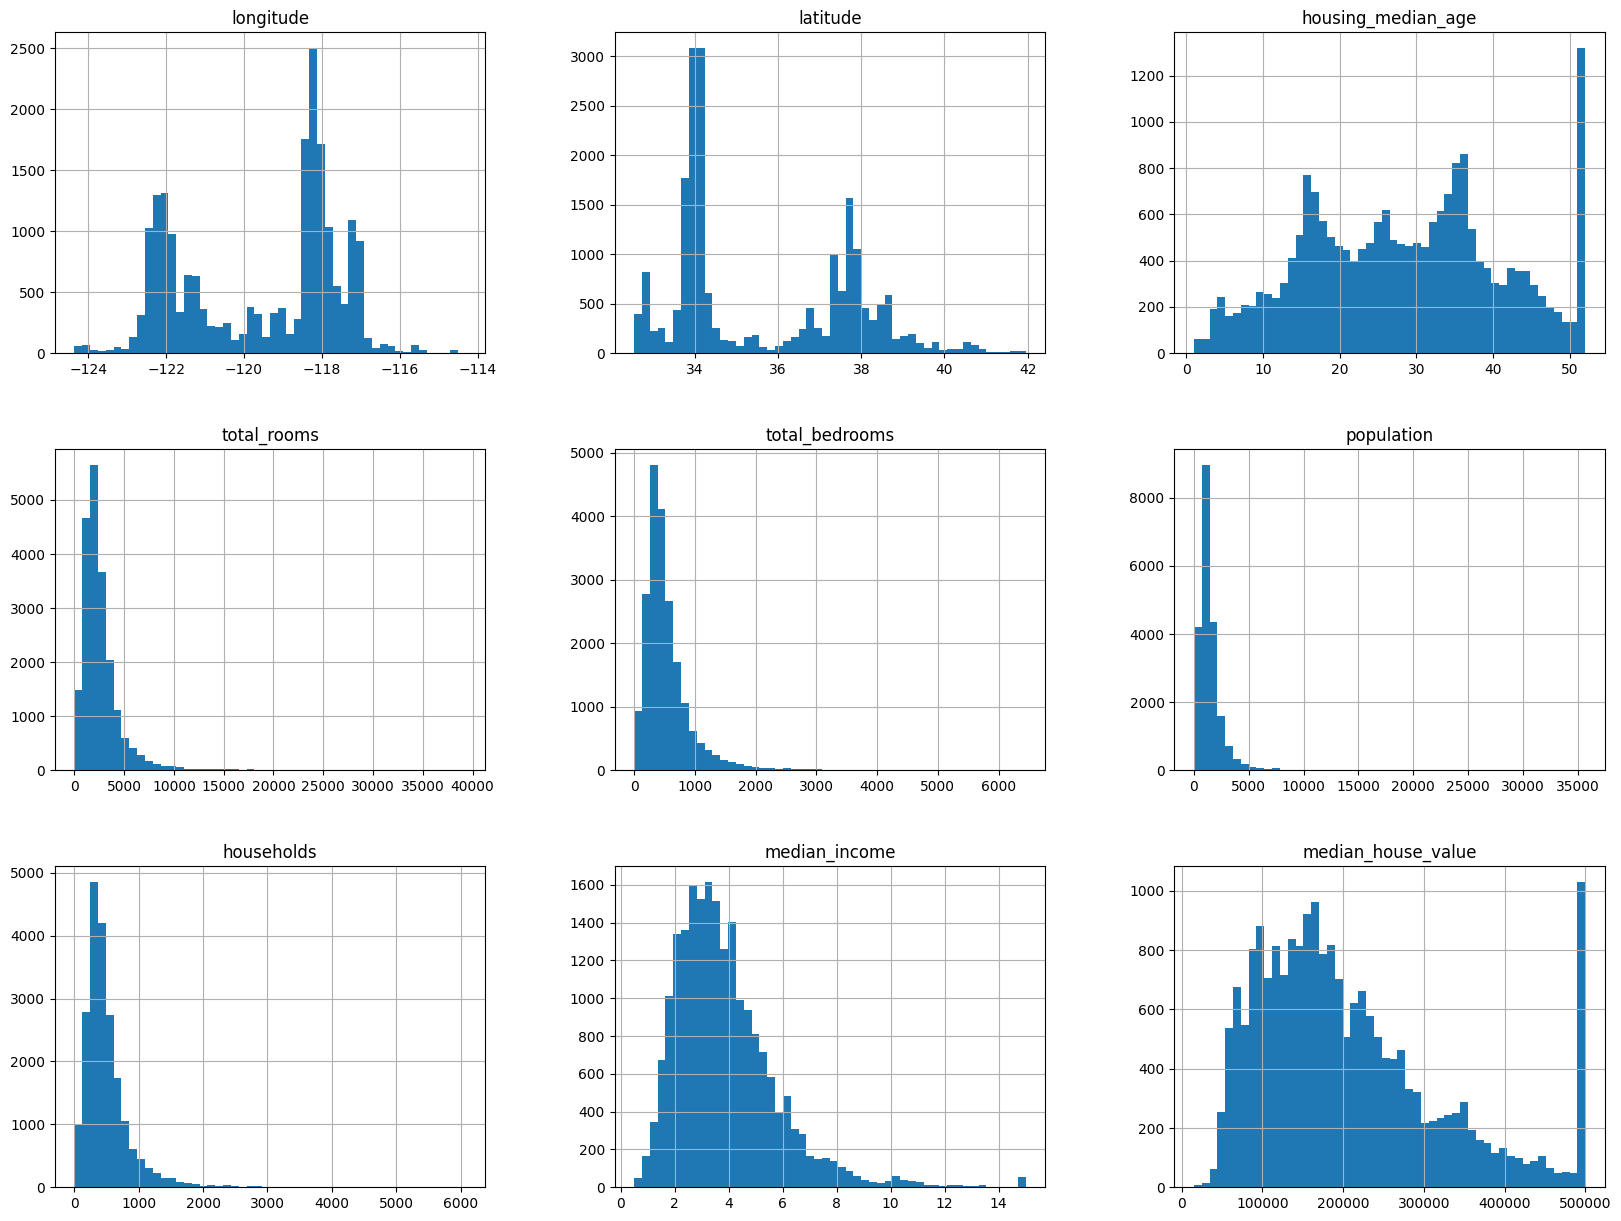

In [10]:
%matplotlib inline
import matplotlib.pyplot as plt
housing.hist(bins=50,figsize=(20,15))
plt.show()


## To avoid sample biasing

In [11]:
import numpy as np

In [12]:
housing["income_cat"] = pd.cut(housing["median_income"],
                               bins=[0., 1.5, 3.0, 4.5, 6., np.inf],
                               labels=[1, 2, 3, 4, 5])


Text(0.5, 0, 'Income Category')

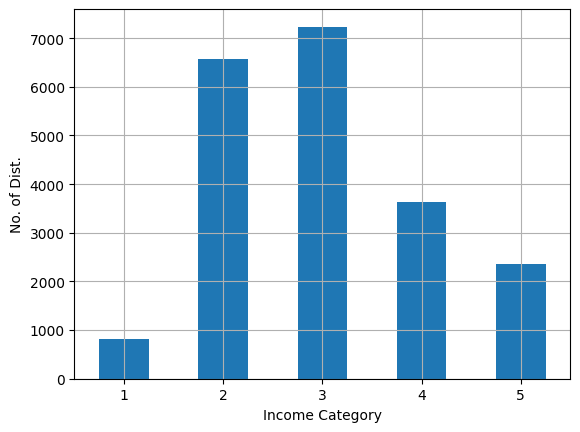

In [13]:
housing['income_cat'].value_counts().sort_index().plot.bar(rot=0,grid=True)
plt.ylabel('No. of Dist.')
plt.xlabel('Income Category')

In [14]:
from sklearn.model_selection import train_test_split

strat_train_set, strat_test_set = train_test_split(housing, test_size=0.2, stratify=housing["income_cat"], random_state=42)

In [15]:
# We don't need income_cat column So We will drop this col
for set in (strat_test_set,strat_train_set):
    set.drop(['income_cat'], axis=1, inplace=True)

## Exploring and Visualizing the Data to Gain Insights

In [16]:
housing = strat_train_set.copy()

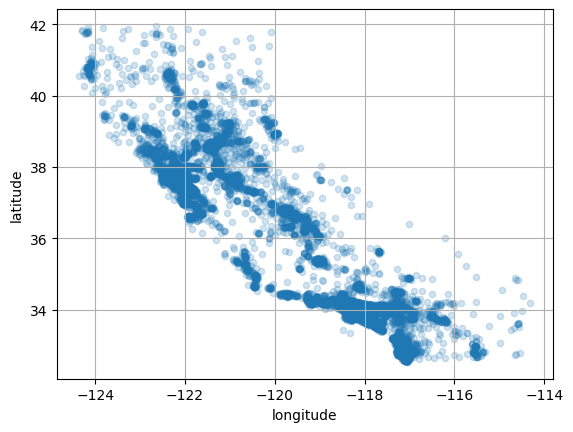

In [17]:
housing.plot(kind='scatter', x='longitude', y='latitude', grid = True, alpha=0.2)
plt.show()

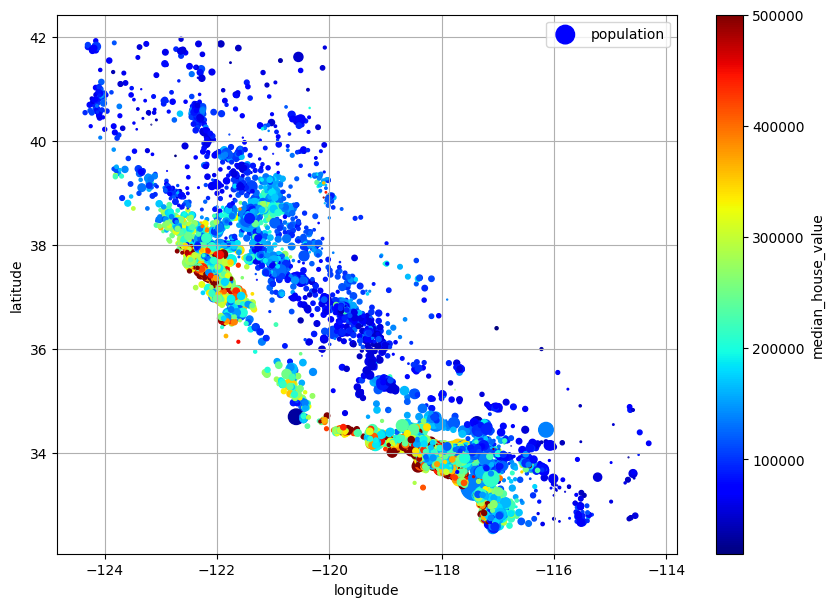

In [20]:
housing.plot(kind='scatter', x='longitude', y='latitude', grid = True, s=housing['population']/100, label = 'population', 
             c='median_house_value', cmap='jet',colorbar=True,legend=True, sharex=False, figsize=(10,7))
plt.show()

## Checking correlation 

In [22]:
corr_matrix = housing.corr(numeric_only=True)

In [25]:
corr_matrix['median_house_value'].sort_values(ascending=False)

median_house_value    1.000000
median_income         0.687151
total_rooms           0.135140
housing_median_age    0.114146
households            0.064590
total_bedrooms        0.047781
population           -0.026882
longitude            -0.047466
latitude             -0.142673
Name: median_house_value, dtype: float64

array([[<Axes: xlabel='median_house_value', ylabel='median_house_value'>,
        <Axes: xlabel='median_income', ylabel='median_house_value'>,
        <Axes: xlabel='total_rooms', ylabel='median_house_value'>,
        <Axes: xlabel='housing_median_age', ylabel='median_house_value'>],
       [<Axes: xlabel='median_house_value', ylabel='median_income'>,
        <Axes: xlabel='median_income', ylabel='median_income'>,
        <Axes: xlabel='total_rooms', ylabel='median_income'>,
        <Axes: xlabel='housing_median_age', ylabel='median_income'>],
       [<Axes: xlabel='median_house_value', ylabel='total_rooms'>,
        <Axes: xlabel='median_income', ylabel='total_rooms'>,
        <Axes: xlabel='total_rooms', ylabel='total_rooms'>,
        <Axes: xlabel='housing_median_age', ylabel='total_rooms'>],
       [<Axes: xlabel='median_house_value', ylabel='housing_median_age'>,
        <Axes: xlabel='median_income', ylabel='housing_median_age'>,
        <Axes: xlabel='total_rooms', ylabel='housi

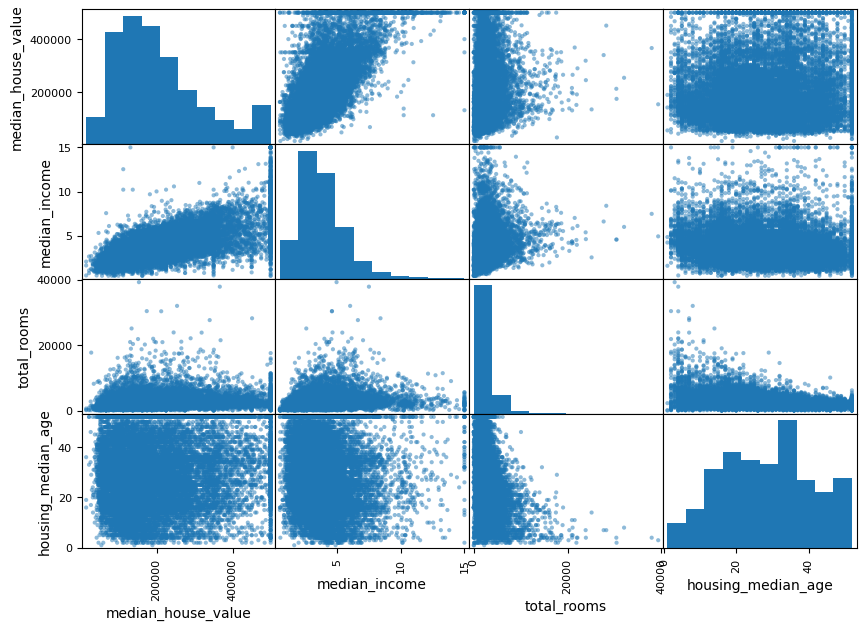

In [40]:
from pandas.plotting import scatter_matrix
scatter_matrix(housing[['median_house_value','median_income','total_rooms','housing_median_age']],figsize=(10,7))

## Correlation B/W Median house income and Median house price is quit strong

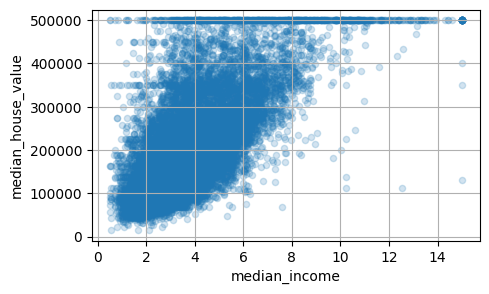

In [41]:
housing.plot(kind='scatter', x='median_income', y='median_house_value', alpha=0.2, grid=True,figsize=(5,3))
plt.show()

## Playing around attribute combinations

In [42]:
housing['room_per_house'] = housing['total_rooms'] / housing['households']
housing['bedroom_ratio'] = housing['total_bedrooms'] / housing['total_rooms']
housing['people_per_household'] = housing['population'] / housing['households']

In [52]:
housing.corr(numeric_only=True)['median_house_value'].sort_values(ascending=False)

median_house_value      1.000000
median_income           0.687151
room_per_house          0.146255
total_rooms             0.135140
housing_median_age      0.114146
households              0.064590
total_bedrooms          0.047781
people_per_household   -0.021991
population             -0.026882
longitude              -0.047466
latitude               -0.142673
bedroom_ratio          -0.259952
Name: median_house_value, dtype: float64

## Creating features and labels